## Stats701-001 Homework 10: Google Tensorflow
### Taylor Spooner
#### spoonert@umich.edu

**Collaboration**: I seeked the help of Roger, Keith and then finally Jack to solve a strange bug in Problem 2.2  
**Time**: Problem 1: 10 minutes, Problem 2: 4 hours, Problem 3: 3 hours, Problem 4: 3 hours.

### Problem 1: Warmup: Constructing a 3-tensor
Create a TensorFlow constant tensor `tflogo` with shape 5-by-4-by-3. This tensor will represent the 5-by-4-by-3 volume that contains the orange structure depicted in the logo (said another way, the orange structure is inscribed in this 5-by-4-by-3 volume). Each cell of your tensor should correspond to one cell in this volume. Each entry of your tensor should be 1 if and only if the corresponding cell is part of the orange structure, and should be 0 otherwise. Looking at the logo, we see that the orange structure can be broken into 11 cubic cells, so your tensor tflogo should have precisely 11 non-zero entries. For the sake of consistency, the $(0, 3, 2)$-entry of your tensor (using 0-indexing) should correspond to the top rear corner of the structure where the cross of the "T" meets the top of the "F".

In [70]:
import tensorflow as tf
import numpy as np

In [ ]:
logo = np.zeros((5,4,3))

In [ ]:
logo[0,:,2] = 1 # Top of the T
logo[0,3,:] = 1 # Top of the F
logo[:,2,2] = 1 # Stem of the T
logo[2,2,1] = 1 # Little part of F

In [ ]:
logo # I hope this is right

In [ ]:
tflogo = tf.constant(logo, dtype=tf.int32)

In [ ]:
tflogo

### Problem 2: Building and training simple models
Use TensorFlow to build the loss functions for a pair of commonly-used statistical models. In all cases, your answer should include placeholder variables $x$ and $ytrue$, which will serve as the predictor (independent variable) and response (dependent variable), respectively. Please use $W$ to denote a parameter that multiplies the predictor, and $b$ to denote a bias parameter (i.e., a parameter that is added).

**1. Logistic regression with a negative log-likelihood loss.**  
Derive the log-likelihood of $Y$ (a Bernoulli random varialbe) , and write the TensorFlow code that represents the negative log-likelihood loss function.

Let $\sigma(z) = (1 + \text{exp}(-z))^{-1}$. We let the probability of success to be $Pr(Y=1|X) = \sigma(W^TX+b)$ and $Pr(Y=0|X) = 1-\sigma(W^TX+b) = (1+\text{exp}^z)^{-1}$, where $X \in \mathbb{R}^6$ is the predictor random variable, and $W \in \mathbb{R}^6$ and $b \in \mathbb{R}$ are the model parameters. Thus, we can see that $1-\sigma(z) = \sigma(-z)$.The likelihood for $Y$ would be:
\begin{align*}
L(W,b) &= \prod_{i=1}^n Pr(y_i=1|X_i)^{y_i} + Pr(y_i=0|X_i)^{1-y_i} \\
&= \prod_{i=1}^n \sigma(W^TX_i+b)^{y_i} + (1-\sigma(W^TX_i+b))^{1-y_i}
\end{align*}

The log-likelihood would be:
\begin{align*}
\ell(W,b) &= \sum_{i=1}^n y_i\text{log}(\sigma(W^TX_i+b)) + (1-y_i)\text{log}(1-\sigma(W^TX_i+b)) \\
&= \sum_{i=1}^n y_i \left[\text{log}(\sigma(W^TX_i+b)) - \text{log}(\sigma(-(W^TX_i+b)))\right] + \text{log}(\sigma(-(W^TX_i+b))) \\
&= \sum_{i=1}^n y_i \text{log}\left(\frac{\sigma(W^TX_i+b)}{\sigma(-(W^TX_i+b))}\right) + \text{log}(\sigma(-(W^TX_i+b))) \\
&= \sum_{i=1}^n y_i \text{log}\left(\frac{1+e^{W^TX_i+b}}{1+e^{-(W^TX_i+b)}}\right) + \text{log}(\sigma(-(W^TX_i+b))) \\
&= \sum_{i=1}^n y_i(W^TX_i+b) + \text{log}\left(\frac{1}{1+e^{W^TX_i+b}}\right) \\
&= \sum_{i=1}^n y_i(W^TX_i+b) - \text{log}(1+e^{W^TX_i+b})
\end{align*}

Therefore, the loss function is the negative of the log-likelihood:
$$L(W,b) = \sum_{i=1}^n -y_i(W^TX_i+b) + \text{log}\left(1+e^{W^TX_i+b}\right) $$


**Problem 2: Estimating Parameters**

In [2]:
w2 = np.zeros([1,6])
w2[0,:] = [1,1,2,3,5,8]
b2 = np.zeros([1,1])
b2[0,0] = -1

In [52]:
W = tf.Variable(tf.ones([6, 1]))#w2, dtype=tf.float32)#tf.random_normal(shape=[1, 6]))#tf.ones([1, 6]))
b = tf.Variable(tf.ones([1, 1]))#b2, dtype=tf.float32)#tf.zeros([1,1]))#tf.ones([1, 1]))
x = tf.placeholder(dtype=tf.float32, shape=[None,6])
ytrue = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [53]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [ ]:
print(sess.run([W]))

In [54]:
mod = tf.matmul(x,W) + b
#log_like = tf.reduce_mean(ytrue*mod - tf.log(1+tf.exp(mod)))
#loss = -log_like
# Write loss function mself
#loss = tf.reduce_mean(-tf.reduce_sum(ytrue*tf.log(1/(1+tf.exp(mod))) + (1-ytrue)*tf.log(1-1/(1+tf.exp(mod)))))
loss = tf.reduce_mean(-ytrue*mod + tf.log(1+tf.exp(mod)))

In [39]:
#log_like = tf.reduce_mean(ytrue*tf.log(tf.sigmoid(mod)) + (1-ytrue)*tf.log(1-tf.sigmoid(mod)))
#loss = -log_like

In [ ]:
# Use their loss function -- seem to get same results
#loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=ytrue))

In [55]:
xtrain = np.load("logistic/logistic_data/logistic_xtrain.npy")

In [ ]:
xtrain[0:3]

In [56]:
ytrain = np.load("logistic/logistic_data/logistic_ytrain.npy")

In [ ]:
ytrain[0:3]

In [57]:
print(sess.run(loss, {x: xtrain, ytrue: ytrain}))

0.7534314


In [65]:
optimizer = tf.train.GradientDescentOptimizer(0.05)
train = optimizer.minimize(loss)
sess.run(init)
#sess.run(train, {x: xtrain, y: ytrain})

In [66]:
niter = 50000
losses = list(range(niter))
for i in range(niter):
    sess.run(train, {x: xtrain, ytrue: ytrain})
    losses[i] = sess.run(loss, {x: xtrain, ytrue: ytrain})
    if (i+1)%10000 == 0:
        print(sess.run([W,b]))
        print(losses[i])

[array([[0.9214451 ],
       [0.73044634],
       [1.926627  ],
       [2.533821  ],
       [4.1213584 ],
       [6.7668943 ]], dtype=float32), array([[-0.7739961]], dtype=float32)]
0.33887318
[array([[0.99073786],
       [0.78143483],
       [2.1024656 ],
       [2.7833598 ],
       [4.5101957 ],
       [7.423027  ]], dtype=float32), array([[-0.82595176]], dtype=float32)]
0.33725947
[array([[1.0081048],
       [0.7942035],
       [2.1458786],
       [2.8448026],
       [4.6059003],
       [7.5842824]], dtype=float32), array([[-0.8389261]], dtype=float32)]
0.33716455
[array([[1.0127327 ],
       [0.79760706],
       [2.1574657 ],
       [2.8612309 ],
       [4.6315093 ],
       [7.6274548 ]], dtype=float32), array([[-0.84240764]], dtype=float32)]
0.3371578
[array([[1.0140285 ],
       [0.79851806],
       [2.1606772 ],
       [2.8655474 ],
       [4.638385  ],
       [7.638809  ]], dtype=float32), array([[-0.8433369]], dtype=float32)]
0.33715722


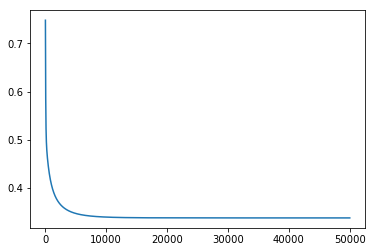

In [67]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

**Problem 3: Evaluating logistic regression on test data.**: Load the test data. What is the negative log-likelihood of your model on this test data?

In [68]:
xtest= np.load("logistic/logistic_data/logistic_xtest.npy")
ytest = np.load("logistic/logistic_data/logistic_ytest.npy")

In [69]:
test_loss = sess.run(loss, {x: xtest, ytrue: ytest})

In [72]:
print("The negative log-likelihood of my model is %f" % test_loss)

The negative log-likelihood of my model is 0.323766


**Problem 4: Evaluating the estimated logistic parameters.** The data was, in reality, generated with $W = (1,1,2,3,5,8)$ and $b = -1$. Write TensorFlow expressions to compute the squared error between your estimated parameters and their true values. What is the squared error?

In [73]:
w2 = np.zeros([1,6])
w2[0,:] = [1,1,2,3,5,8]
W_true = tf.Variable(w2, dtype=tf.float32)
W_est = tf.Variable(sess.run(W), dtype=tf.float32)
b2 = np.zeros([1,1])
b2[0,0] = -1
b_true = tf.Variable(b2, dtype=tf.float32)
b_est = tf.Variable(sess.run(b), dtype=tf.float32)

In [74]:
# Only init the new variables!!!! YAYYYY THIS TOOK ME FOREVER
init_new_vars_op = tf.variables_initializer([W_true, W_est, b_true, b_est])
sess.run(init_new_vars_op)

In [75]:
sq_error = tf.reduce_sum(tf.sqrt(tf.reduce_sum(tf.square(W_est - W_true)+tf.square(b_est-b_true))))

In [77]:
print("The squared error between my estimated parameters and the true values is", sess.run(sq_error))

The squared error between my estimated parameters and the true values is 20.657099


**Problem 5:** Classification of normally distributed data.  
The given file contains four Numpy .npy files that contain train and test data generated from $K = 3$ different classes. Each class $k \in \{1,2,3\}$ has an associated mean $\mu_k \in R$ and variance $\sigma^2_k \in R$, and all observations from a given class are i.i.d. $N(\mu_k, \sigma^2_k)$.

In [2]:
xtrain = np.load("normal/normal_data/normal_xtrain.npy")
ytrain = np.load("normal/normal_data/normal_ytrain.npy")

In [40]:
xtrain[0]

array([0.08894486])

In [ ]:
ytrain[0:5]

In [3]:
# The softmax model
x = tf.placeholder(tf.float32, [None, 1]) # Each input vector will be of length 1
ytrue = tf.placeholder(tf.float32, [None, 3]) # True values of y

In [4]:
mu = tf.Variable(tf.ones([1,3]), name = "mu"))
sig = tf.Variable(tf.ones([1,3]), name = "sigma")

In [9]:
dist = tf.distributions.Normal(loc=mu, scale=tf.sqrt(sig))

In [10]:
p = tf.distributions.Normal(loc=mu, scale=sig).log_prob(x)

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [12]:
# Our cross entropy function.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ytrue*p, 1))

In [15]:
train_step = tf.train.AdamOptimizer(.01).minimize(cross_entropy)

In [34]:
# Start up a session.
sess = tf.InteractiveSession()
tf.global_variables_initializer().run() #Init x and y
# We'll take 5000 gradient steps.
nsteps = 50000
for i in range(nsteps):
    sess.run(train_step, feed_dict={x: xtrain, ytrue: ytrain})
    if (i+1) % 10000 == 0:
        print(sess.run([mu, tf.square(sig)]))

[array([[-0.9815421 ,  0.00808077,  3.0174544 ]], dtype=float32), array([[0.51139224, 1.0041757 , 1.4120849 ]], dtype=float32)]
[array([[-0.9810107 ,  0.00908463,  3.017315  ]], dtype=float32), array([[0.5114386, 1.0073848, 1.4121407]], dtype=float32)]
[array([[-0.98102087,  0.00808189,  3.0173187 ]], dtype=float32), array([[0.5114282, 1.0041863, 1.4120184]], dtype=float32)]
[array([[-0.9775462 ,  0.00913367,  3.0015502 ]], dtype=float32), array([[0.5149112, 1.0044861, 1.4124054]], dtype=float32)]
[array([[-0.9810055 ,  0.00807592,  3.01746   ]], dtype=float32), array([[0.51139367, 1.0041841 , 1.4127324 ]], dtype=float32)]


**Problem 6: Evaluating loss on test data.** Load the test data. What is the cross-entropy of your model on this test data?

In [17]:
xtest = np.load("normal/normal_data/normal_xtest.npy")
ytest = np.load("normal/normal_data/normal_ytest.npy")

In [18]:
test_loss = sess.run(cross_entropy, {x: xtest, ytrue: ytest})

In [19]:
print("The cross-entropy of the test data is %f" % test_loss)

The cross-entropy of the test data is 1.353063


**Problem 7: Evaluating parameter estimation on test data.** Compute the total squared error between your estimates and their true values.

In [45]:
mu_true = np.zeros([1,3])
mu_true[0,:] = [-1,0,3]
mu_true = tf.Variable(mu_true, dtype=tf.float32)
mu_est = tf.Variable(sess.run(mu), dtype=tf.float32)
sig_true = np.zeros([1,3])
sig_true[0,:] = [0.5, 1, 1.5]
sig_true = tf.Variable(sig_true, dtype=tf.float32)
sig_est = tf.Variable(sess.run(sig), dtype=tf.float32)

In [46]:
# Only init the new variables!!!! YAYYYY THIS TOOK ME FOREVER
init_new_vars_op = tf.variables_initializer([mu_true, mu_est, sig_true, sig_est])
sess.run(init_new_vars_op)

In [22]:
sq_error = tf.reduce_sum(tf.sqrt(tf.reduce_sum(tf.square(mu_est - mu_true) + tf.square(sig_est-sig_true))))

In [23]:
param_sq_error = sess.run(sq_error)

In [24]:
print("The total squared error between the estimates and their true values are %f" % param_sq_error)

The total squared error between the estimates and their true values are 0.379461


**Problem 8: Evaluating classification error on test data.** Compute the classification error of your estimated model averaged over the test data.

In [68]:
# Use the final estimates with the xtest to get a probability vector p
# Then create a one hot encodding from that probability vector
# Then run correct and prediction.
p_fin = tf.distributions.Normal(loc=mu_est, scale=sig_est).log_prob(x)

In [74]:
correct_prediction = tf.equal(tf.argmax(p_fin, 1), tf.argmax(ytrue, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Have to case bool to floats to take mean.
# Run of test data
test_acc = sess.run(accuracy, feed_dict={x: xtest, ytrue: ytest})

In [73]:
prediction = tf.argmax(p_fin, 1)

In [60]:
# Save this model so we can use it for problem 4
tf.saved_model.simple_save(sess, "spoonert_normal_trained", inputs = {"x": x}, 
                           outputs={"prediction": prediction})

INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b'spoonert_normal_trained\\saved_model.pb'


In [27]:
print("The test accuracy is", test_acc)

The test accuracy is 0.72


# Problem 3
For this problem, we have decided to go through the tutorial on Wide & Deep Learning Tutorial which will solve a binary classification problem using the Census data. All code is taken from https://www.tensorflow.org/tutorials/wide

Here are some different model thresholds/parameters that we can change.

In [61]:
model_type = 'wide' # Can be 'deep', 'wide', or 'wide_deep'
batch_size = 80
train_epochs=40
epochs_between_evals = 20
stop_threshold = .2

In [75]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys

from six.moves import urllib
import tensorflow as tf

First step is to load and clean the data which is done here. Saves two data files `adult.data` and `adult.test` to your current directory. I have uploaded the two files in my submission so you do not need to run the next three cells.

In [30]:
"""Download and clean the Census Income Dataset."""
DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult'
TRAINING_FILE = 'adult.data'
TRAINING_URL = '%s/%s' % (DATA_URL, TRAINING_FILE)
EVAL_FILE = 'adult.test'
EVAL_URL = '%s/%s' % (DATA_URL, EVAL_FILE)

"""Downloads data from url, and makes changes to match the CSV format."""
def _download_and_clean_file(filename, url):
    temp_file, _ = urllib.request.urlretrieve(url)
    with tf.gfile.Open(temp_file, 'r') as temp_eval_file:
        with tf.gfile.Open(filename, 'w') as eval_file:
            for line in temp_eval_file:
                line = line.strip()
                line = line.replace(', ', ',')
                if not line or ',' not in line:
                    continue
                if line[-1] == '.':
                  line = line[:-1]
                line += '\n'
                eval_file.write(line)
    tf.gfile.Remove(temp_file)

In [16]:
# Download the training data
_download_and_clean_file(TRAINING_FILE, TRAINING_URL)

In [17]:
# Download the test data
_download_and_clean_file(EVAL_FILE, EVAL_URL)

Now we are going to build the model with all of the possible predictors. I thought it was really good practice seeing how to read in a dataset and use the `feature_column` function.

In [12]:
_CSV_COLUMNS = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'gender',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
    'income_bracket'
]

_CSV_COLUMN_DEFAULTS = [[0], [''], [0], [''], [0], [''], [''], [''], [''], [''],
                        [0], [0], [0], [''], ['']]

_NUM_EXAMPLES = {
    'train': 32561,
    'validation': 16281,
}


LOSS_PREFIX = {'wide': 'linear/', 'deep': 'dnn/'}


def build_model_columns():
    """Builds a set of wide and deep feature columns."""
    # Continuous columns
    age = tf.feature_column.numeric_column('age')
    education_num = tf.feature_column.numeric_column('education_num')
    capital_gain = tf.feature_column.numeric_column('capital_gain')
    capital_loss = tf.feature_column.numeric_column('capital_loss')
    hours_per_week = tf.feature_column.numeric_column('hours_per_week')

    education = tf.feature_column.categorical_column_with_vocabulary_list(
      'education', [
          'Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
          'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
          '5th-6th', '10th', '1st-4th', 'Preschool', '12th'])

    marital_status = tf.feature_column.categorical_column_with_vocabulary_list(
      'marital_status', [
          'Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
          'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'])

    relationship = tf.feature_column.categorical_column_with_vocabulary_list(
      'relationship', [
          'Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
          'Other-relative'])

    workclass = tf.feature_column.categorical_column_with_vocabulary_list(
      'workclass', [
          'Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
          'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'])

    # To show an example of hashing:
    occupation = tf.feature_column.categorical_column_with_hash_bucket(
      'occupation', hash_bucket_size=1000)

    # Transformations.
    age_buckets = tf.feature_column.bucketized_column(
      age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])

    # Wide columns and deep columns.
    base_columns = [
      education, marital_status, relationship, workclass, occupation,
      age_buckets,
      ]

    crossed_columns = [
      tf.feature_column.crossed_column(
          ['education', 'occupation'], hash_bucket_size=1000),
      tf.feature_column.crossed_column(
          [age_buckets, 'education', 'occupation'], hash_bucket_size=1000),
  ]

    wide_columns = base_columns + crossed_columns

    deep_columns = [
      age,
      education_num,
      capital_gain,
      capital_loss,
      hours_per_week,
      tf.feature_column.indicator_column(workclass),
      tf.feature_column.indicator_column(education),
      tf.feature_column.indicator_column(marital_status),
      tf.feature_column.indicator_column(relationship),
      # To show an example of embedding
      tf.feature_column.embedding_column(occupation, dimension=8),
  ]

    return wide_columns, deep_columns

def build_estimator(model_dir, model_type):
    """Build an estimator appropriate for the given model type."""
    wide_columns, deep_columns = build_model_columns()
    hidden_units = [100, 75, 50, 25]

    # Create a tf.estimator.RunConfig to ensure the model is run on CPU, which
    # trains faster than GPU for this model.
    run_config = tf.estimator.RunConfig().replace(
        session_config=tf.ConfigProto(device_count={'GPU': 0}))

    if model_type == 'wide':
        return tf.estimator.LinearClassifier(
            model_dir=model_dir,
            feature_columns=wide_columns,
            config=run_config)
    elif model_type == 'deep':
        return tf.estimator.DNNClassifier(
            model_dir=model_dir,
            feature_columns=deep_columns,
            hidden_units=hidden_units,
            config=run_config)
    else:
        return tf.estimator.DNNLinearCombinedClassifier(
            model_dir=model_dir,
            linear_feature_columns=wide_columns,
            dnn_feature_columns=deep_columns,
            dnn_hidden_units=hidden_units,
            config=run_config)


This next step runs the above functions to actually build our Model.

In [52]:
import shutil
shutil.rmtree("", ignore_errors=True)
model = build_estimator("", model_type)

train_file = 'adult.data'
test_file = 'adult.test'

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Taylor\\AppData\\Local\\Temp\\tmpg_iju42t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': device_count {
  key: "GPU"
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002147B7AEDD8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [53]:
def input_fn(data_file, num_epochs, shuffle, batch_size):
    """Generate an input function for the Estimator."""
    assert tf.gfile.Exists(data_file), (
      '%s not found. Please make sure you have run data_download.py and '
      'set the --data_dir argument to the correct path.' % data_file)

    def parse_csv(value):
        print('Parsing', data_file)
        columns = tf.decode_csv(value, record_defaults=_CSV_COLUMN_DEFAULTS)
        features = dict(zip(_CSV_COLUMNS, columns))
        labels = features.pop('income_bracket')
        return features, tf.equal(labels, '>50K')

    # Extract lines from input files using the Dataset API.
    dataset = tf.data.TextLineDataset(data_file)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=_NUM_EXAMPLES['train'])

    dataset = dataset.map(parse_csv, num_parallel_calls=5)

    # We call repeat after shuffling, rather than before, to prevent separate
    # epochs from blending together.
    dataset = dataset.repeat(num_epochs)
    dataset = dataset.batch(batch_size)
    return dataset

In [54]:
# Train and evaluate the model every `flags.epochs_between_evals` epochs.
def train_input_fn():
    return input_fn(
            train_file, epoch_size, True, batch_size)

def eval_input_fn():
    return input_fn(test_file, 1, False, batch_size)

In [55]:
loss_prefix = LOSS_PREFIX.get(model_type, '')

**Alright so this step I honestly don't know what is going on at all. The Tensorflow people created abunch of their own modules that I do not understand. What are hooks? I think they are just ways to evaulate the model? Well, these modules were made in `.py` scripts. I couldn't figure out how to install them for jupyter notebook. So I downloaded the raw script files, included them in my submission. So the files `hook_helper.py`, `hooks.py`, `logger.py` and `metric_hook.py` are all from Tensorflow and I don't really get what they do.**

In [56]:
import hooks_helper

In [62]:
train_hooks = hooks_helper.get_train_hooks(
      ["LoggingTensorHook", "ProfilerHook"], batch_size=batch_size,
      tensors_to_log={'average_loss': loss_prefix + 'head/truediv',
                      'loss': loss_prefix + 'head/weighted_loss/Sum'})

Now we actually train out model. It prints out a lot of stuff and saves these annoying files to your directory. I wouldn't run it if I were you. It also takes a really long time.

In [63]:
# Train and evaluate the model every `flags.epochs_between_evals` epochs.
for n in range(train_epochs // epochs_between_evals):
    model.train(input_fn=train_input_fn, hooks=train_hooks)
    results = model.evaluate(input_fn=eval_input_fn)

    # Display evaluation metrics
    #print('Results at epoch', (n + 1) * flags.epochs_between_evals)
    #print('-' * 60)
#    for key in sorted(results):
#        print('%s: %s' % (key, results[key]))
    print(results['accuracy'])
    if model_helpers.past_stop_threshold(
        stop_threshold, results['accuracy']):
        break

Parsing adult.data
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Taylor\AppData\Local\Temp\tmpg_iju42t\model.ckpt-270466
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 270467 into C:\Users\Taylor\AppData\Local\Temp\tmpg_iju42t\model.ckpt.
INFO:tensorflow:average_loss = 0.26792917, loss = 21.434334
INFO:tensorflow:Saving timeline for 270467 into 'timeline-270467.json'.
INFO:tensorflow:loss = 21.434334, step = 270467
INFO:tensorflow:global_step/sec: 68.1094
INFO:tensorflow:average_loss = 0.31428963, loss = 25.14317 (1.472 sec)
INFO:tensorflow:loss = 25.14317, step = 270567 (1.335 sec)
INFO:tensorflow:global_step/sec: 155.805
INFO:tensorflow:average_loss = 0.29576772, loss = 23.661419 (0.642 sec)
INFO:tensorflow:loss = 23.661419, step = 270667 (0.643 sec)
INF

NameError: name 'model_helpers' is not defined

In [65]:
results

{'accuracy': 0.8330569,
 'accuracy_baseline': 0.76377374,
 'auc': 0.8728841,
 'auc_precision_recall': 0.6740983,
 'average_loss': 0.37615576,
 'global_step': 677479,
 'label/mean': 0.23622628,
 'loss': 30.020548,
 'prediction/mean': 0.23711917}

We see the accuracy for test data is about 83% as told be the tutorial. Yay!

# Problem 4: Running Models on Google Cloud Platform

To run my model's prediction I ran the following lines of code:

**OH S@^! IT WORKED, THATS SO COOL!!!!!!** My model thinks that $x=4$ came from the 2nd cluster. This makes sense looking at the true parameters given to us in question 2. So my golly I think I got this crazy thing to work.